# Dimensionality reduction and regression with (vanilla) autoencoder

In [2]:
#load MNIST dataset 

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#use the first 10k in the training dataset (just for demo)
x_train = x_train[0:10000]
y_train = y_train[0:10000]

#normalize the images
x_train = np.expand_dims(x_train/255.0, axis=-1)
x_test = np.expand_dims(x_test/255.0, axis=-1)

#define the labels
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

print(x_train.shape)
print(x_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
#plot function for sample images

def plot_tile(samples):
    
    num_samples, x_dim, y_dim, _ = samples.shape
    axes = (np.round(np.sqrt(num_samples))).astype(int)
    fig = plt.figure(figsize=(axes, axes))
    gs = gridspec.GridSpec(axes, axes)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_aspect('equal')
        plt.imshow(sample, cmap=plt.get_cmap('viridis'), aspect='auto')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


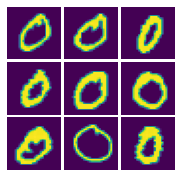

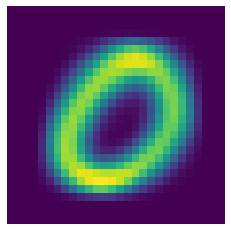

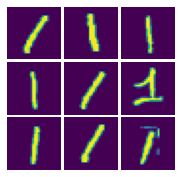

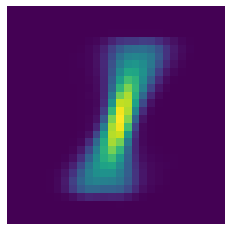

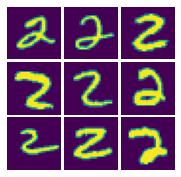

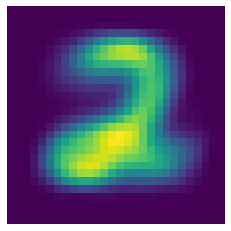

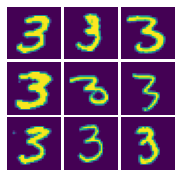

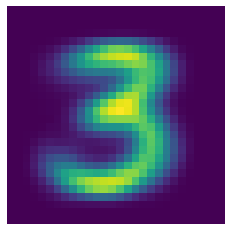

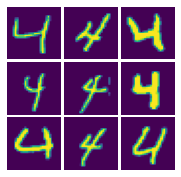

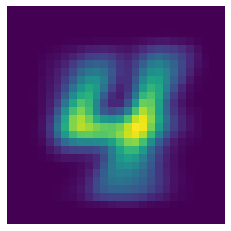

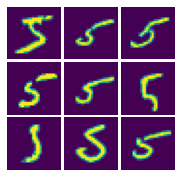

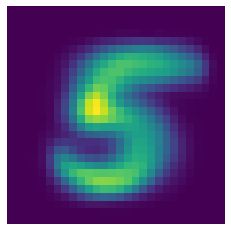

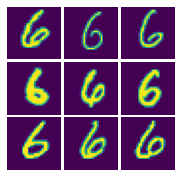

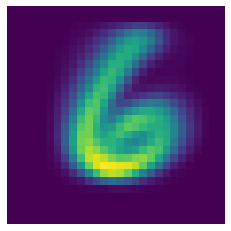

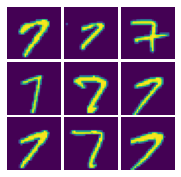

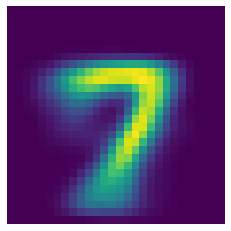

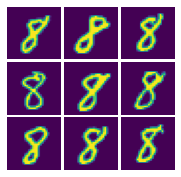

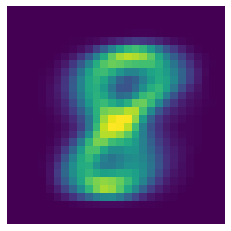

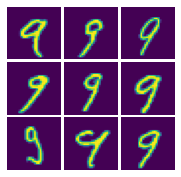

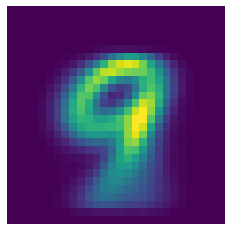

In [4]:
#visualize first 9 samples of input images based on class labels, within the training dataset

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])
    
    x_train_perlabel_mean = np.mean(np.squeeze(x_train_perlabel), axis=0) 
    plt.figure(figsize=[4, 4])
    plt.imshow(x_train_perlabel_mean) 
    plt.axis('off')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


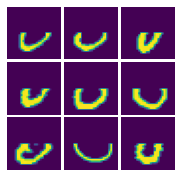

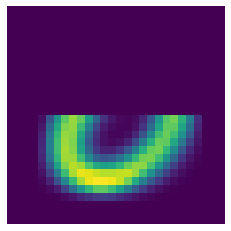

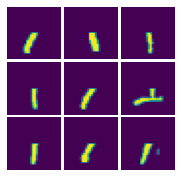

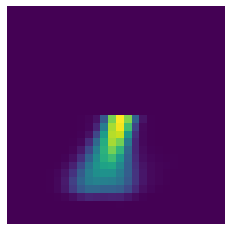

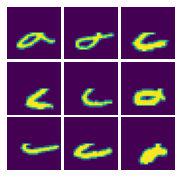

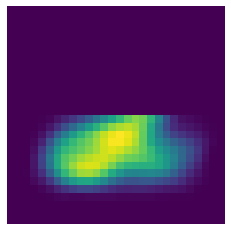

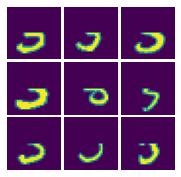

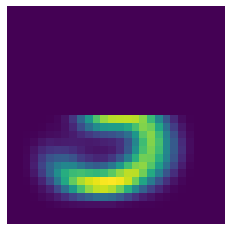

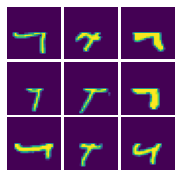

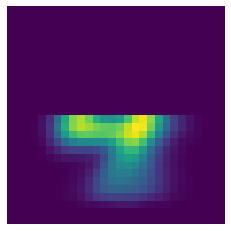

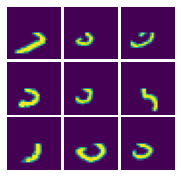

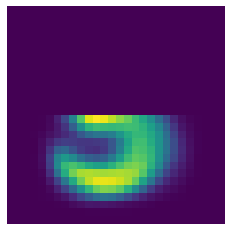

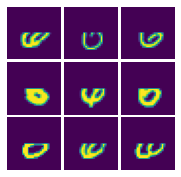

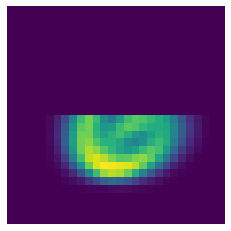

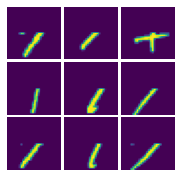

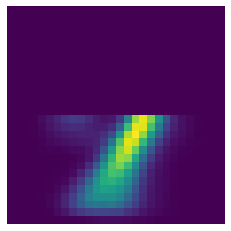

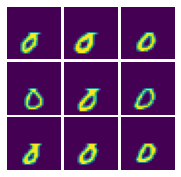

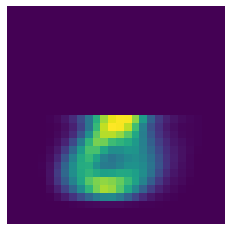

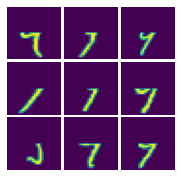

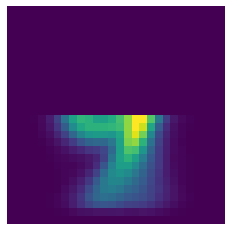

In [5]:
#hide the top half or bottom half

x_train_reg = np.copy(x_train)
x_test_reg = np.copy(x_test)

x_train_reg[:, 0:14, :, 0] = 0     #hide top half
x_test_reg[:, 0:14, :, 0] = 0

#x_train_reg[:, 14:, :, 0] = 0     #hide bottom half
#x_test_reg[:, 14:, :, 0] = 0

for label in unique_labels:
    x_train_perlabel = x_train_reg[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])
    
    x_train_perlabel_mean = np.mean(np.squeeze(x_train_perlabel), axis=0) 
    plt.figure(figsize=[4, 4])
    plt.imshow(x_train_perlabel_mean) 
    plt.axis('off')

# Experiment 1: Regression with (vanilla) autoencoder

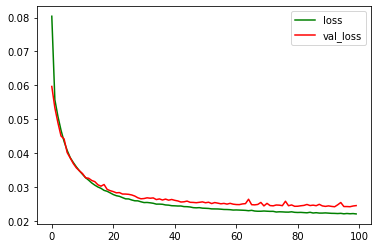

In [6]:
import autoencoderdual

z_dim = 16

AE = autoencoderdual.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
AE.train_autoencoder2D(x_train_reg, x_train, load = False)

In [7]:
#lets get some regression with the trained model

reg_train_ae = AE.AE_m2m.predict(x_train_reg)
reg_test_ae = AE.AE_m2m.predict(x_test_reg)

print(reg_train_ae.shape)
print(reg_test_ae.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Experiment 2: Regression and reconstruction with (vanilla) dual autoencoder

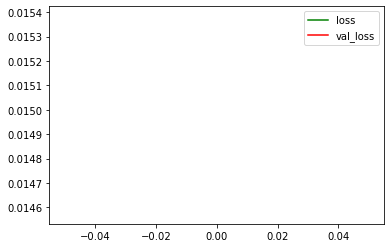

(150, 4)
(150, 4)


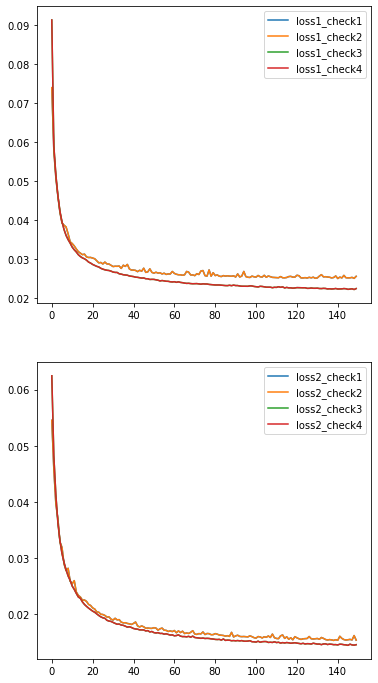

In [8]:
#dual autoencoder model

dual_AE = autoencoderdual.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
dual_AE.train_autoencoder2D_dual(x_train_reg, x_train, load = False)

In [9]:
#lets get some reconstructions and regression with the trained model

recons_train = dual_AE.AE_m2m.predict(x_train)
recons_test = dual_AE.AE_m2m.predict(x_test)

print(recons_train.shape)
print(recons_test.shape)

reg_train = dual_AE.AE_m2m_reg.predict(x_train_reg)
reg_test = dual_AE.AE_m2m_reg.predict(x_test_reg)

print(reg_train.shape)
print(reg_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Display results

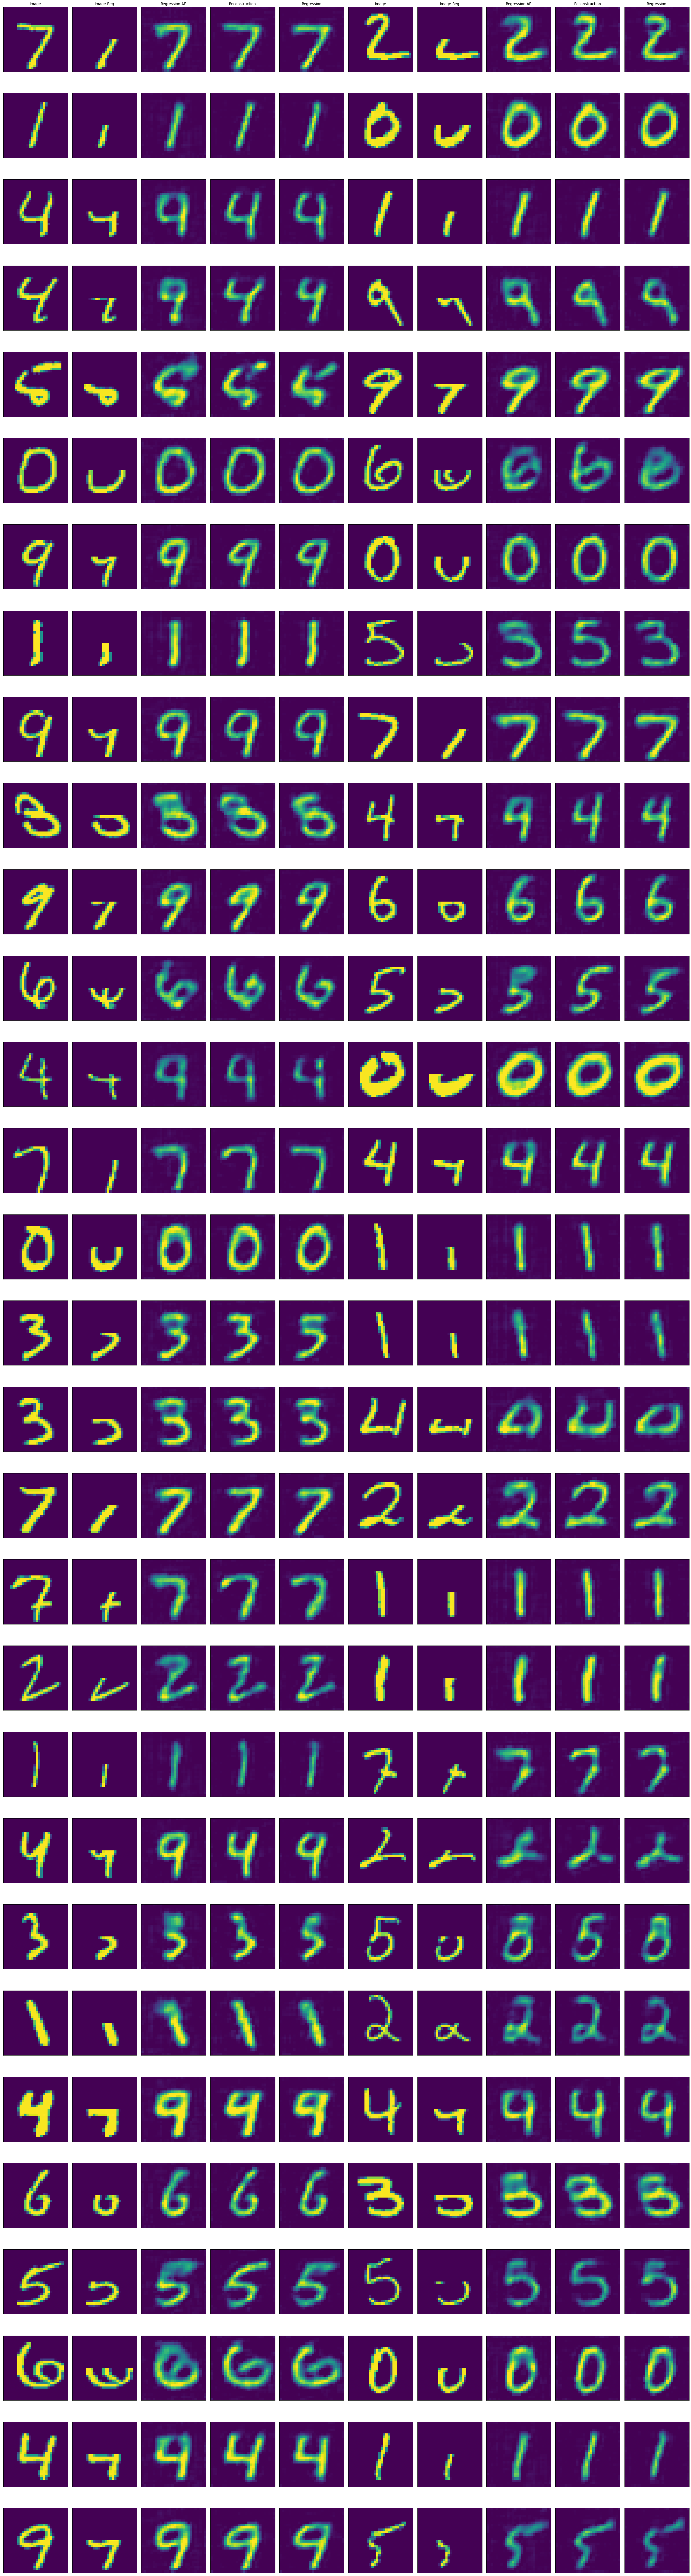

In [10]:
#plot some test images with predicted vs true labels

num_rows = 30
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 5*num_cols, 5*i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Image')
    
    plt.subplot(num_rows, 5*num_cols, 5*i+2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_reg[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Image-Reg')
    
    plt.subplot(num_rows, 5*num_cols, 5*i+3)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reg_test_ae[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Regression-AE')
    
    plt.subplot(num_rows, 5*num_cols, 5*i+4)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(recons_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Reconstruction')
        
    plt.subplot(num_rows, 5*num_cols, 5*i+5)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reg_test[i], vmin=0, vmax=1)
    if i < 2:
        plt.title('Regression')
    
plt.tight_layout()
plt.show()

# Tabulate the RMSE

In [11]:
def RMSE(x, y, portion='full'):
    if portion == 'full':
        RMSE = np.sqrt(np.mean((x.flatten() - y.flatten())**2))
    elif portion == 'upper':
        RMSE = np.sqrt(np.mean((x[:, 0:14, :, 0].flatten() - y[:, 0:14, :, 0].flatten())**2))
    elif portion == 'lower':
        RMSE = np.sqrt(np.mean((x[:, 14:, :, 0].flatten() - y[:, 14:, :, 0].flatten())**2))
    else:
        print('Not implemented')
    return RMSE

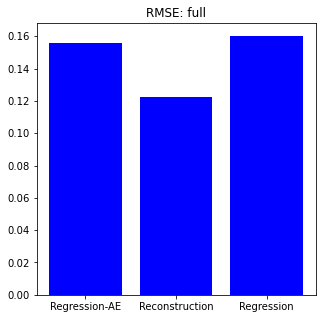

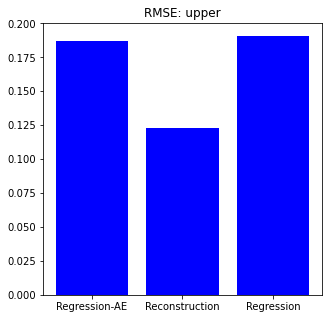

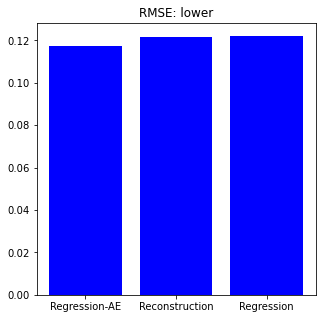

In [12]:
#calculate the RMSE for the entire image

portions = ['full', 'upper', 'lower']
labels = ['Regression-AE', 'Reconstruction', 'Regression']

for p in portions:
    RMSEs = [RMSE(x_test, reg_test_ae, p), 
             RMSE(x_test, recons_test, p), 
             RMSE(x_test, reg_test, p)]

    plt.figure(figsize=[5, 5])
    plt.bar(labels, RMSEs, color='b')
    plt.title('RMSE: ' + p)